In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplitlib inline #  will make your plot outputs appear and be stored within the notebook. 
from math import sqrt
import sys, os
from contextlib import contextmanager
import matplotlib as mpl
import seaborn as sns
import sklearn

### climate_data.csv, predict the "LandAverageTemperature" of year 2015 

In [2]:
df = pd.read_csv('./data/climate_data.csv')
df.head(10)

,dt,LandAverageTemperature
0,1/1/2010,3.737
1,2/1/2010,4.399
2,3/1/2010,6.738
3,4/1/2010,9.671
4,5/1/2010,12.406
5,6/1/2010,14.421
6,7/1/2010,15.213
7,8/1/2010,14.768
8,9/1/2010,12.863
9,10/1/2010,10.442


#### Using moving average with suitable k.

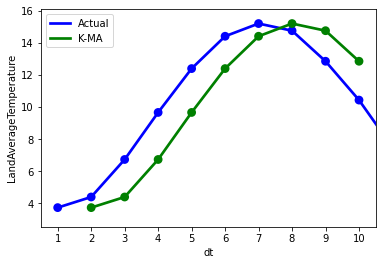

In [49]:
import seaborn as sns

def moving_average(df, k, to_date):
    moving_average_df = pd.DataFrame(columns=['dt', 'LandAverageTemperature'])
    num_df = len(df)
    for m in range(0, to_date):
        if m < k:
            temp_predict = float('nan')
        else:
            history = df['LandAverageTemperature'][m-k:m]
            temp_predict = history.mean()
        moving_average_df.loc[m] = [m+1, temp_predict]
        
    moving_average_df['dt'] = moving_average_df['dt'].astype(int)
    return moving_average_df

f, ax = plt.subplots(1, 1)
## Assume k = 1
ma_df = moving_average(df, 1, 10)
sns.pointplot(x='dt', y='LandAverageTemperature', data=df, color='b')
sns.pointplot(x='dt', y='LandAverageTemperature', data=ma_df, color='g')
ax.legend(handles=ax.lines[::len(df)+1], labels=['Actual', 'K-MA'])
plt.show()


#### Using linear regression

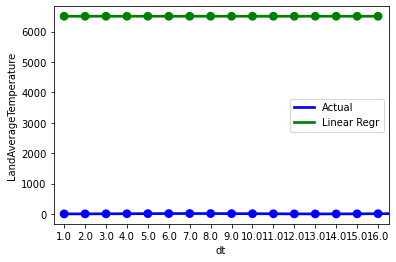

In [73]:
# https://stackoverflow.com/questions/40217369/python-linear-regression-predict-by-date
import seaborn as sns
import datetime as dt

def linear_regression(df):
    linear_df = df.copy()
    '''
    Linear regression doesn't work on date data. 
    Therefore we need to convert it into numerical value.
    The following code will convert the date into numerical value:
    '''
    linear_df['dt'] = pd.to_datetime(linear_df['dt'])
    linear_df['dt']= linear_df['dt'].map(dt.datetime.toordinal)
    
#     print(linear_df['dt'] )
    
    linear_df['dtLandAverageTemperature'] = linear_df['dt'] * linear_df['LandAverageTemperature']
    linear_df['dt_2'] = linear_df['dt'] * linear_df['dt']
    linear_df['LandAverageTemperature_2'] = linear_df['LandAverageTemperature'] \
                                            * linear_df['LandAverageTemperature']
    linear_sum = linear_df.sum()
    linear_mean = linear_df.mean()
    
    b = (linear_sum['dtLandAverageTemperature'] - len(df) * linear_mean['dt'] \
         * linear_mean['LandAverageTemperature'] ) \
         / (linear_sum['LandAverageTemperature_2'] - len(df) * linear_mean['LandAverageTemperature_2'] \
         * linear_mean['LandAverageTemperature_2'])
    
    a = linear_mean['LandAverageTemperature'] - b * linear_mean['dt']
#     print(linear_mean['dt'])
    return a, b

a,b = linear_regression(df)

linear_df = pd.DataFrame(columns=['dt', 'LandAverageTemperature'])
for m in range(1, 17):
    sale = a + b * m
    linear_df.loc[m-1] = [m,sale]
linear_df['dt'] = linear_df['dt']

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='dt', y='LandAverageTemperature', data=df, color='b')
sns.pointplot(ax=ax, x='dt', y='LandAverageTemperature', data=linear_df, color='g')

ax.legend(handles=ax.lines[::len(df)+2], labels=['Actual', 'Linear Regr'])

### The ground-truth of the climate data can be found in actual_climate.csv

In [76]:
eval_df = pd.read_csv('./data/actual_climate.csv')

In [77]:
eval_df.head(10)

,1/1/2015,3.881
0,2/1/2015,4.664
1,3/1/2015,6.740
2,4/1/2015,9.313
3,5/1/2015,12.312
4,6/1/2015,14.505
5,7/1/2015,15.051
6,8/1/2015,14.755
7,9/1/2015,12.999
8,10/1/2015,10.801
9,11/1/2015,7.433


#### Visualize the ground-truth

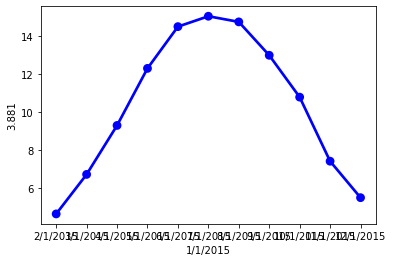

In [78]:
sns.pointplot(x='1/1/2015', y='3.881', data=eval_df, color='b')

#### Compare the accuracy of above methods

In [ ]:
### Not yet